#Análise de experimentos

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns

In [7]:
ensaios = np.array([[-1, -1], [1, -1], [-1, 1], [1, 1]])
ensaios

array([[-1, -1],
       [ 1, -1],
       [-1,  1],
       [ 1,  1]])

##pyDOE2

In [4]:
!pip install pyDOE2
import pyDOE2 as doe

  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-cp37-none-any.whl size=25519 sha256=48a90adce2aa39747f2fc1fd858d3d504f50e7743dd4fcdb3d94edb9a26c07db
  Stored in directory: /root/.cache/pip/wheels/60/88/1d/b334ee00dd83e82d111ec56c3be91573d335c93870698037f1
Successfully built pyDOE2


In [6]:
ensaios = doe.ff2n(2)
ensaios

array([[-1., -1.],
       [ 1., -1.],
       [-1.,  1.],
       [ 1.,  1.]])

In [14]:
experimento = pd.DataFrame(ensaios, columns=['farinha', 'chocolate'])
experimento

,farinha,chocolate
0,-1,-1
1,1,-1
2,-1,1
3,1,1


In [15]:
experimento['porcoes'] = [19, 37, 24, 49]
experimento

,farinha,chocolate,porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49


##Vizualização gráfica

In [12]:
sns.set_palette('terrain')
sns.set_style('darkgrid')

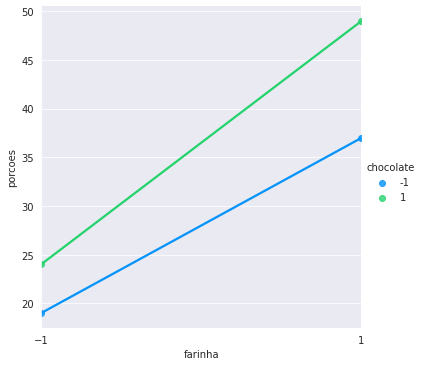

In [20]:
ax1 = sns.lmplot(data=experimento, x='farinha', y='porcoes', hue='chocolate', ci=None)
ax1.set(xticks = (-1,1))

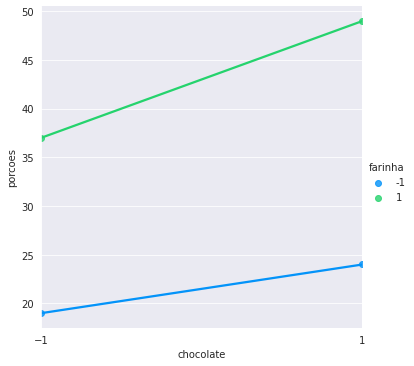

In [26]:
ax2 = sns.lmplot(data=experimento, x='chocolate', y='porcoes', hue='farinha', ci=None) 
ax2.set(xticks = (-1,1))

##Modelo estatístico

In [29]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [30]:
modelo = smf.ols(data=experimento, formula='porcoes ~ farinha + chocolate + farinha:chocolate')

In [31]:
modelo_ajustado = modelo.fit()

In [34]:
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                     0.000
Date:                Fri, 02 Apr 2021   Prob (F-statistic):                nan
Time:                        21:51:05   Log-Likelihood:                 127.41
No. Observations:                   4   AIC:                            -246.8
Df Residuals:                       0   BIC:                            -249.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            32.2500        in

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  "samples were given." % int(n), ValueWarning)


##Análise de significancia estatítica

In [35]:
centro = np.array([[0, 0, 29],
                   [0, 0, 30],
                   [0, 0, 29],
                   [0, 0, 30]])

In [37]:
centro_df = pd.DataFrame(centro, columns=['farinha', 'chocolate', 'porcoes'], index=[4, 5, 6, 7])
centro_df

,farinha,chocolate,porcoes
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [38]:
experimento = experimento.append(centro_df)

In [39]:
experimento

,farinha,chocolate,porcoes
0,-1,-1,19
1,1,-1,37
2,-1,1,24
3,1,1,49
4,0,0,29
5,0,0,30
6,0,0,29
7,0,0,30


In [40]:
modelo = smf.ols(data=experimento, formula=('porcoes ~ farinha + chocolate + farinha:chocolate'))

In [41]:
modelo_ajustado = modelo.fit()

In [45]:
print(modelo_ajustado.summary()) # se valor de p>|t| < 0.05 parâmetro é significativo caso contrário o parâmetro pode ser descartado

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                     45.21
Date:                Fri, 02 Apr 2021   Prob (F-statistic):            0.00152
Time:                        22:10:11   Log-Likelihood:                -14.155
No. Observations:                   8   AIC:                             36.31
Df Residuals:                       4   BIC:                             36.63
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            30.8750      0.71

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [47]:
t_valores = modelo_ajustado.tvalues
t_valores

Intercept            43.494275
farinha              10.708252
chocolate             4.233495
farinha:chocolate     1.743204
dtype: float64

In [48]:
nome = t_valores.index.tolist()
nome 

['Intercept', 'farinha', 'chocolate', 'farinha:chocolate']

In [53]:
from scipy import stats

In [55]:
distribuicao = stats.t(df=4)
distribuicao.ppf(q=1-0.025)

2.7764451051977987

In [56]:
limite = [distribuicao.ppf(q=1-0.025)]*len(nome)

In [57]:
limite

[2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987,
 2.7764451051977987]

Text(0.5, 0, 't-values')

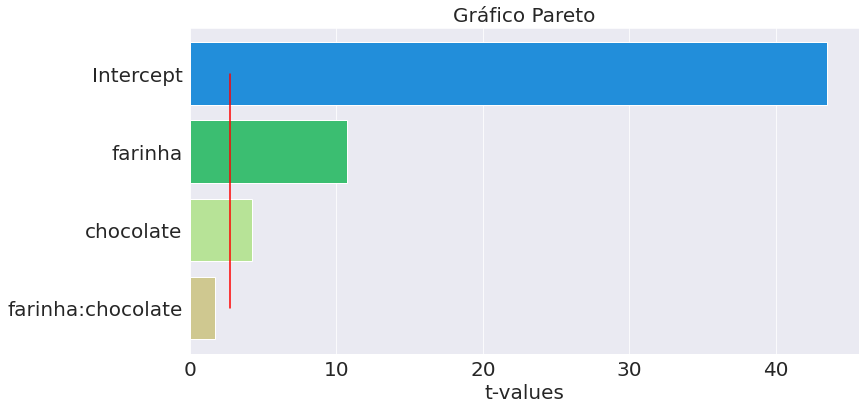

In [58]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.plot(limite, nome, 'r') #para valores menores que o t-cal o parâmetro não é significativo
pareto.figure.set_size_inches(12,6)
pareto.tick_params(labelsize=20)
pareto.set_title('Gráfico Pareto',  fontsize=20)
pareto.set_xlabel('t-values', fontsize=20)

##Novo modelo estatístico

In [59]:
modelo = smf.ols(data=experimento, formula=('porcoes ~ farinha + chocolate'))
modelo_ajustado = modelo.fit()
print(modelo_ajustado.summary())

                            OLS Regression Results                            
Dep. Variable:                porcoes   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     47.09
Date:                Fri, 02 Apr 2021   Prob (F-statistic):           0.000571
Time:                        22:40:42   Log-Likelihood:                -16.416
No. Observations:                   8   AIC:                             38.83
Df Residuals:                       5   BIC:                             39.07
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.8750      0.842     36.658      0.0

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  "anyway, n=%i" % int(n))


In [60]:
t_valores = modelo_ajustado.tvalues
nome = t_valores.index.tolist()
distribuicao = stats.t(df=5)
distribuicao.ppf(q=1-0.025)
limite = [distribuicao.ppf(q=1-0.025)]*len(nome)

Text(0, 0.5, 'Parâmetro')

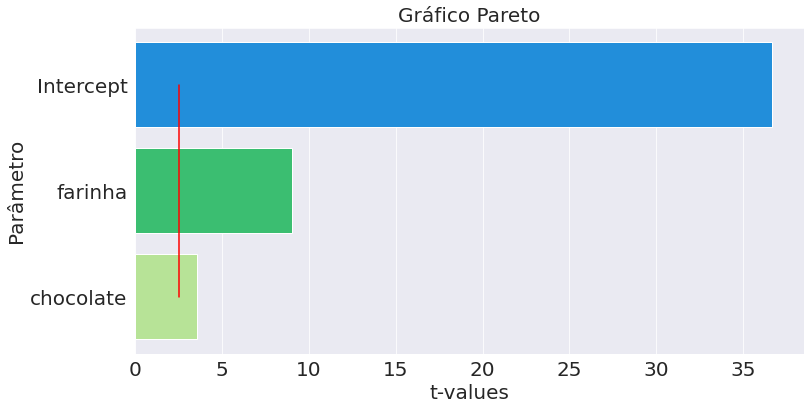

In [63]:
pareto = sns.barplot(x=t_valores, y=nome)
pareto.plot(limite, nome, 'r') #para valores menores que o t-cal o parâmetro não é significativo
pareto.figure.set_size_inches(12,6)
pareto.tick_params(labelsize=20)
pareto.set_title('Gráfico Pareto',  fontsize=20)
pareto.set_xlabel('t-values', fontsize=20)
pareto.set_ylabel('Parâmetro', fontsize=20)

##previsões dos modelos

In [64]:
observados = experimento['porcoes']
observados

0    19
1    37
2    24
3    49
4    29
5    30
6    29
7    30
Name: porcoes, dtype: int64

In [66]:
preditos = modelo_ajustado.predict()
preditos

array([15.875, 37.375, 24.375, 45.875, 30.875, 30.875, 30.875, 30.875])

In [67]:
import matplotlib.pyplot as plt

(15.0, 50.0)

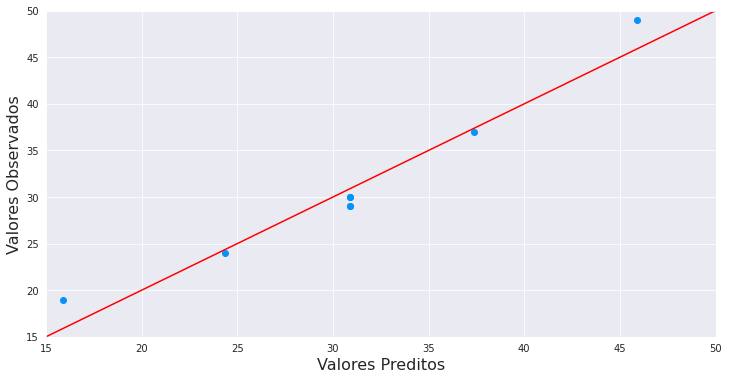

In [69]:
plt.figure(figsize=(12,6))
plt.xlabel('Valores Preditos', fontsize=16)
plt.ylabel('Valores Observados', fontsize=16)
plt.scatter(preditos, observados)
x=np.linspace(start=10, stop=55, num=10)
y=np.linspace(start=10, stop=55, num=10)
plt.plot(x, y, 'r-', )
plt.xlim((15,50))
plt.ylim((15,50))

##Parâmetros do Modelo

In [70]:
parametros = modelo_ajustado.params
parametros

Intercept    30.875
farinha      10.750
chocolate     4.250
dtype: float64

In [75]:
def modelo_receita(x_f, x_c):
    #limites de normalização
    limite_normalizado = [-1,1]
    limite_farinha = [0.5, 1.5]
    limite_chocolate = [0.1, 0.5]
    #normalização
    x_f_conv = np.interp(x_f, limite_farinha, limite_normalizado)
    x_c_conv = np.interp(x_c, limite_chocolate, limite_normalizado)
    #equação
    porcoes = parametros['Intercept'] + parametros['farinha'] * x_f_conv + parametros['chocolate'] * x_c_conv

    return porcoes.round(0)

In [76]:
modelo_receita(0.5,0.1)

16.0

##Grafico mapa de cores

In [77]:
x_farinha = np.linspace(start=0.5, stop=1.5, num=10)
x_farinha

array([0.5       , 0.61111111, 0.72222222, 0.83333333, 0.94444444,
       1.05555556, 1.16666667, 1.27777778, 1.38888889, 1.5       ])

In [78]:
x_chocolate = np.linspace(start=0.1, stop=0.5, num=10)
x_chocolate

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [83]:
pontos = []

for i in x_farinha:
    temp = []
    for j in x_chocolate:
        temp.append(modelo_receita(i, j))
    pontos.append(temp)

In [79]:
import matplotlib.cm as cm

<a list of 7 text.Text objects>

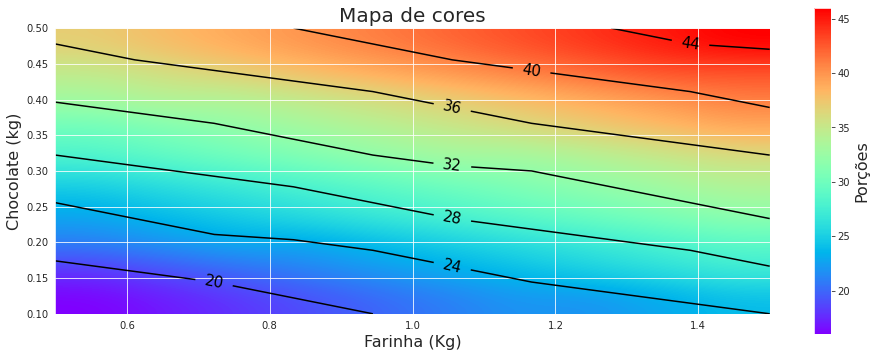

In [102]:
plt.figure(figsize=(16,6))
mapa_cor = plt.imshow(pontos, origin='lower', cmap=cm.rainbow, interpolation='quadric', extent=(0.5,1.5,0.1,0.5))
plt.title('Mapa de cores', fontsize=20)
plt.xlabel('Farinha (Kg)', fontsize=16)
plt.ylabel('Chocolate (kg)', fontsize=16)
plt.colorbar().set_label('Porções', fontsize=16)
linhas = plt.contour(x_farinha, x_chocolate, pontos, colors='k', linewidths=1.5)
plt.clabel(linhas, inline=True, fmt='%1.0f', fontsize=15, inline_spacing=10)